In [70]:
from PIL import Image
import numpy as np

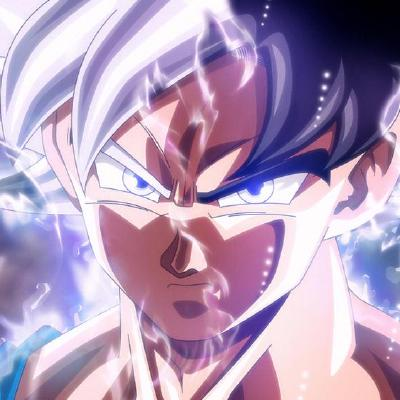

In [71]:
image = Image.open('./goku.jpeg')
image

In [72]:
pixels = np.array(image)
w, h, colors = pixels.shape
w, h, colors

(400, 400, 3)

In [73]:
pixels = pixels / 255
pixels

array([[[0.96862745, 0.9254902 , 0.98823529],
        [0.96470588, 0.92156863, 0.98431373],
        [0.96078431, 0.91764706, 0.98039216],
        ...,
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941]],

       [[0.97254902, 0.92941176, 0.99215686],
        [0.96862745, 0.9254902 , 0.98823529],
        [0.96470588, 0.92156863, 0.98431373],
        ...,
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941]],

       [[0.97254902, 0.92941176, 0.99215686],
        [0.97254902, 0.92941176, 0.99215686],
        [0.97254902, 0.92941176, 0.99215686],
        ...,
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941],
        [0.00392157, 0.        , 0.02352941]],

       ...,

       [[0.1372549 , 0.5372549 , 0.79607843],
        [0.06666667, 0.41568627, 0.6745098 ],
        [0.1372549 , 0

In [74]:
pixels[100, 50]
summation = np.zeros((1, 3))
summation += pixels[100, 50]
summation

array([[0.56470588, 0.57647059, 0.77647059]])

In [75]:
output_image_array = np.zeros((w, h, colors))
output_image_array

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [76]:
for i in range(w):
  for j in range(h):
    window = [
      [i-1, j-1], [i, j-1], [i+1, j-1],
      [i-1, j], [i, j], [i+1, j],
      [i-1, j+1], [i, j+1], [i+1, j+1]
    ]
    
    pixel = pixels[i, j]
    
    summation = np.zeros((1, 3))
    
    for k in window:
      if k[0] < 0 or k[1] < 0 or k[0] > w-1 or k[1] > h-1:
        p = np.zeros((1, 3))
      else:
        p = pixels[k[0], k[1]] * 1 / 9
      summation += p
      
    output_image_array[i, j] = summation
          


In [77]:
output_image_array = (output_image_array * 255).astype(np.uint8)
output_image_array

array([[[109, 104, 112],
        [164, 157, 167],
        [163, 156, 167],
        ...,
        [  0,   0,   4],
        [  0,   0,   4],
        [  0,   0,   2]],

       [[164, 157, 168],
        [246, 235, 252],
        [246, 235, 251],
        ...,
        [  1,   0,   6],
        [  1,   0,   6],
        [  0,   0,   4]],

       [[164, 157, 168],
        [247, 236, 252],
        [247, 236, 252],
        ...,
        [  1,   0,   6],
        [  1,   0,   6],
        [  0,   0,   4]],

       ...,

       [[ 17,  81, 125],
        [ 29, 114, 181],
        [ 30, 100, 166],
        ...,
        [ 88,  42,  71],
        [ 85,  42,  72],
        [ 56,  28,  48]],

       [[ 16,  81, 125],
        [ 28, 114, 181],
        [ 30, 101, 166],
        ...,
        [ 89,  44,  72],
        [ 85,  42,  73],
        [ 56,  28,  49]],

       [[ 10,  54,  83],
        [ 18,  76, 121],
        [ 20,  67, 111],
        ...,
        [ 60,  30,  48],
        [ 57,  28,  48],
        [ 37,  19,  32]]

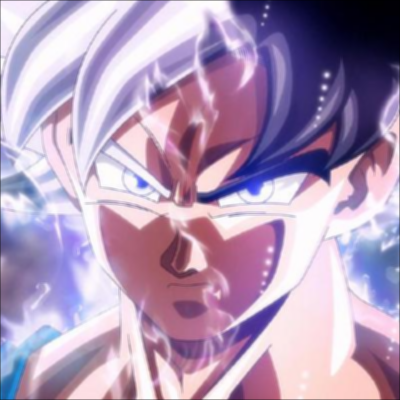

In [78]:
output_image = Image.fromarray(output_image_array)
output_image

In [79]:
output_image.save("blurred.jpeg")